In [1]:
#@title Installation
!pip install facebook-scraper
!pip3 install flair
!pip install malaya
!pip install sentence-transformers
!pip install hdbscan
!pip install umap
!pip install summa
!pip install keybert
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 1.9 MB/s 
     |████████████████████████████████| 132 kB 9.8 MB/s 
     |████████████████████████████████| 288 kB 55.3 MB/s 
     |████████████████████████████████| 749 kB 57.1 MB/s 
     |████████████████████████████████| 83 kB 2.5 MB/s 
     |████████████████████████████████| 112 kB 46.6 MB/s 
     |████████████████████████████████| 138 kB 52.9 MB/s 
     |████████████████████████████████| 127 kB 50.9 MB/s 
  Created wheel for demjson3: filename=demjson3-3.0.5-py3-none-any.whl size=76070 sha256=fcf22fd0aab566b90b603075d8073d2c15ab7c0dfab815796cf93e8eb3e81a5a
  Stored in directory: /root/.cache/pip/wheels/c1/8b/a2/29e1cb2a9a3a27a5cfe8a57856a3310ea1e3c0a394eee8db61
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=e40bf4c8dbf0656eb1c14c19fba1b39248445fda029dda2ceb29d85e5d283b71
  Stored in di

In [3]:
#@title Import required libraries
# Import necessary libraries
from facebook_scraper import get_posts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import flair
import malaya
from sentence_transformers import SentenceTransformer
import random
from functools import partial
import numpy as np
import hdbscan
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import umap.umap_ as umap
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval, Trials
import collections
from pathlib import Path
import spacy
from spacy import displacy
import string
from summa import keywords
from keybert import KeyBERT
from tqdm.notebook import trange
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from langdetect import detect 
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
import twint
import nest_asyncio
nest_asyncio.apply()

fatal: destination path 'twint' already exists and is not an empty directory.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=4ebd3fa0d93709ed64244f222dafb4579f0c78524975f6f05a8fdd473cfb68bc
  Stored in directory: /tmp/pip-ephem-wheel-cache-wx7xx0a8/wheels/f7/3e/11/2803f3c6890e87a9bec35bb8e37ef1ad0777a00f43e2441fb1
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21


In [4]:
import twint
import nest_asyncio
nest_asyncio.apply()

# Twitter 

In [ ]:
#@title Twitter Scraping
malaysia = ['Kuala Lumpur', 'Petaling Jaya', 'George Town','Melaka','Shah Alam', 'Johor Bahru','Ipoh','Kuching']
for city in malaysia:
    print(city)
    c = twint.Config()
    c.Search = "RM100 B40"
    c.Lang= "in"
    c.Pandas = True
    c.Since = "2022-05-27"
    c.Near = city
    c.Limit = 400
    c.Store_csv = True
    c.Output = "./" + "data.csv"
    twint.run.Search(c)
    
test_df = twint.storage.panda.Tweets_df
test_df.head()


Kuala Lumpur
1540227262531768320 2022-06-24 06:56:10 +0000 <surayazham> nak tergelak bila dia kata alih subsidi dari penternak kepada pengguna, tapi bagi bantuan duit rm100 untuk b40 dengan rm50 untuk yang bujang. cuba cakap dengan aku duit banyak tu boleh tahan berapa lama?
1540125897189388288 2022-06-24 00:13:22 +0000 <AlawiyahYussof> Hanya di Bolehland  Pemberian subsidi kepada pihak industri sebelum ini akan diganti dengan bantuan kewangan RM100, diberi secara langsung kepada kumpulan B40.  Respon penerima (yang disiar oleh Bulletin Utama, TV3: Bersyukur, dapat meringankan beban akibat kenaikan harga barang.
1539947730105434114 2022-06-23 12:25:24 +0000 <belon1986> @Natcromancer Shouldn't be the fight between M40 &amp; B40.. And the RM50 /RM100 won't solve the root of problem, what should we concern is any action from government to control the inflation or increase our wages.. I see none..
1539908768598634496 2022-06-23 09:50:35 +0000 <ErnaBerjaya> Rm100 boleh beli apa?  Beli rasa 

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1540469464956710912,1540458651747782656,1.656112e+12,2022-06-24 22:58:35,+0000,,@JPenerangan RT @JPenerangan: BANTUAN TUNAI TA...,in,[],[],...,,,,,,"[{'screen_name': 'JPenerangan', 'name': 'Jabat...",,,,
1,1539812608869425153,1539812608869425153,1.655955e+12,2022-06-23 03:28:28,+0000,,Bantuan RM100 dan RM50 untuk #KeluargaMalaysi...,in,[keluargamalaysia],[],...,,,,,,[],,,,
2,1539557425438932998,1539557425438932998,1.655894e+12,2022-06-22 10:34:28,+0000,,"BKM : Isi rumah B40 terima tambahan RM100, RM5...",in,[],[],...,,,,,,[],,,,
3,1539535286992277504,1539535286992277504,1.655889e+12,2022-06-22 09:06:30,+0000,,"BKM untuk B40 , RM100 untuk isi rumah dan RM50...",in,[],[],...,,,,,,[],,,,


In [ ]:
#@title Twitter Data Preprocessing
import re
test_df = test_df[test_df['language'] == 'in']

# Remove url 
def remove_url(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    print(text)
    return url_pattern.sub(r'', text)

# Remove username as they don't contain meaningful information
def remove_username(text):
  return re.sub("@[A-Za-z0-9]+","", text)

# Remove hastags
def remove_hastags(text):
  return re.sub("#[A-Za-z0-9_]+","", text)

test_df['tweet']= test_df['tweet'].apply(lambda x:remove_url(x))
test_df['tweet']= test_df['tweet'].apply(lambda x:remove_username(x))
test_df['tweet']= test_df['tweet'].apply(lambda x:remove_hastags(x))

@JPenerangan RT @JPenerangan: BANTUAN TUNAI TAMBAHAN | GOLONGAN B40  YAB PM, Dato' Sri Ismail Sabri Yaakob mengumumkan tambahan bayaran RM50 dan RM100 kepada penerima BKM selepas mengambil kira cabaran kos sara hidup dan kenaikan harga barang makanan ketika ini.   https://t.co/7WBldwFnkH
Bantuan RM100  dan RM50 untuk #KeluargaMalaysia . Saya berharap pihak menteri ini cuba hidup sebagai b40 supaya mereka tahu nilai sebenar rm100. Dengan kadar inflasi sekarang, apa yg mereka mampu beli dan berapa lama ia bertahan?
BKM : Isi rumah B40 terima tambahan RM100, RM50 untuk bujang    https://t.co/fwjZ0Bcmab  https://t.co/ViuYIkXYce
BKM untuk B40 , RM100 untuk isi rumah dan RM50 untuk bujang dibayar mulai 27 Jun 2022  https://t.co/0hjn4qOaby


In [ ]:
#Convert Twitter Comment to list
all_comments = test_df['tweet'].tolist()

# Facebook comments

### Preparation for facebook scraping
1. Download Chrome extension from https://www.editthiscookie.com/
2. Log into your facebook
3. Export cookies by following the step in picture below:
<img src="https://drive.google.com/uc?export=view&id=1oNB6Z0v2CMHPQ4bvFAEZGOk3VZrrpGRy" width="300" height="350"/>
4. Paste the copied content into notepad and saved it as cookies.txt
5. Upload the file into colab and rename it as cookies.json
6. Enter the post url into the input section to scrape the comments

In [5]:
#@title Scrape facebook comments from url
from facebook_scraper import set_cookies
set_cookies("cookies.json")
post_url = 'ohmymedia.cc/posts/pfbid028d41DaeTeGE2g6VfTVyuvxQom6WCZuW6nSwm9UGeAoDMLMENWctkiNBEekHC6n7Tl' #@param {type:"string"}
post = next(get_posts(post_urls=[post_url], options={"comments": True}))
print(f"Comments: {post['comments']}, Top level comments: {len(post['comments_full'])}, Replies: {sum(len(c['replies']) for c in post['comments_full'])}")

Comments: 3553, Top level comments: 1734, Replies: 847


In [6]:
#@title Convert all the comments into dataframe
df = pd.DataFrame.from_dict(post['comments_full'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   comment_id              1734 non-null   object        
 1   comment_url             1734 non-null   object        
 2   commenter_id            1734 non-null   object        
 3   commenter_url           1734 non-null   object        
 4   commenter_name          1734 non-null   object        
 5   commenter_meta          200 non-null    object        
 6   comment_text            1734 non-null   object        
 7   comment_time            1734 non-null   datetime64[ns]
 8   comment_image           505 non-null    object        
 9   comment_reactors        1734 non-null   object        
 10  comment_reactions       0 non-null      object        
 11  comment_reaction_count  0 non-null      object        
 12  replies                 1734 non-null   object  

In [7]:
df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,comment_reactors,comment_reactions,comment_reaction_count,replies
0,5132515873532798,https://facebook.com/5132515873532798,100000207341142,https://facebook.com/sweetieja?fref=nf&rc=p&__...,Ieeja Aris,None,M40 juga termenung.. tersepit. Cukai kene baya...,2022-06-21,https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJX...,[],None,None,"[{'comment_id': '1415145435654543', 'comment_u..."
1,5938118549538746,https://facebook.com/5938118549538746,100051206881294,https://facebook.com/harry.hari.3979489?fref=n...,Harry Hari,Top fan,Amboii Uncle...pemurah\nbetul kerajaan kita..1...,2022-06-21,https://scontent.xx.fbcdn.net/m1/v/t6/An_F9bJG...,[],None,None,"[{'comment_id': '609241830270910', 'comment_ur..."
2,1398187664026987,https://facebook.com/1398187664026987,100013119120535,https://facebook.com/eyna.mazli?fref=nf&rc=p&_...,Eyna Mazli,None,"😅😅😅 rm50 bujang\nSerius la,dia ingt org bujang...",2022-06-21,https://scontent.xx.fbcdn.net/m1/v/t6/An_F9bJG...,[],None,None,"[{'comment_id': '1281938978879966', 'comment_u..."
3,355402723372706,https://facebook.com/355402723372706,100002957030931,https://facebook.com/saifulamirulapek?fref=nf&...,Saiful Amirul,None,Daripada Bagi bantuan tambahan.. baik peruntuk...,2022-06-21,https://scontent.xx.fbcdn.net/m1/v/t6/An_UvxJX...,[],None,None,"[{'comment_id': '1471492443315659', 'comment_u..."
4,793619972016449,https://facebook.com/793619972016449,100038039893689,https://facebook.com/profile.php?id=1000380398...,Hadi Ibrar,Top fan,Yg kita teparksa tanggung hari² kesan kenaikan...,2022-06-21,https://media1.tenor.co/images/3a137d5a443caef...,[],None,None,"[{'comment_id': '732017921174291', 'comment_ur..."


In [8]:
#@title convert all the comments to list
all_comments = df['comment_text']
all_comments.tolist()

['M40 juga termenung.. tersepit. Cukai kene bayar. Pendapatan cukup2 makan. Nak hantar anak prasekolah tak lepas, kene hantar tadika swasta. Anak2 lain sekolah ddk transit/duit van lagi.. baru2 ni cikgu taska inform kene naik lagi yuran sebab kenaikan kos…haritu bersalin, claim subsidi car seat pun tak lepas… hanya mampu berdoa. Moga Allah cukupkan rezeki kita semua. Tak lebih takpe, asalkan cukup, anak-anak cukup makan. Sesekali dapat belanja KFC untuk anak2.. aaminnn.',
 'Amboii Uncle...pemurah\nbetul kerajaan kita..100...ban\nyak tu...satu family tak payah gi kerja setahun....Eskl\nah saya nak hantar surat berhenti kerja jadi cikgu..Duit ni.siap boleh bercuti2 lagi....Dari bantuan ini..golongan b40 boleh tukar status kepada T20...Yeayyy',
 '😅😅😅 rm50 bujang\nSerius la,dia ingt org bujang zaman la mcm zaman2 bujang lapok dlu ka..😌😌😌\n#alhmdulillah\nSatg ada yg kecam plk',
 'Daripada Bagi bantuan tambahan.. baik peruntukan untuk bantuan ni Kekalkan subsidi minyak /\nAyam...Kenapa nk na

#Sentiment analysis

In [9]:
#@title Load Sentiment Analysis model and keyword extration model
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
model_malay = malaya.sentiment.transformer(model = 'tiny-bert')
kw_model = KeyBERT(model='all-mpnet-base-v2')
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

2022-07-05 08:22:33,550 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp2uq11nsz


100%|██████████| 265512723/265512723 [00:12<00:00, 21726402.92B/s]

2022-07-05 08:22:46,159 copying /tmp/tmp2uq11nsz to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-07-05 08:22:46,840 removing temp file /tmp/tmp2uq11nsz
2022-07-05 08:22:46,892 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/569k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [10]:
#@title Language detection function
def detect_language(text):
    try:
      result_lang = detect(text)
    except:
      return 'en'
    return result_lang
  

In [11]:
#@title Perform sentiment analysis
sentiment_list = []
sentiment_score_list = []
for sentence in all_comments:
  if detect_language(sentence) == 'id':
    sentiment_ms = model_malay.predict([sentence])
    sentiment_dict = model_malay.predict_proba([sentence])
    sentiment_list.append(sentiment_ms[0].upper())
    sentiment_score_list.append(sentiment_dict[0][sentiment_ms[0]])
  else:
    s = flair.data.Sentence(sentence)
    flair_sentiment.predict(s)
    total_sentiment = s.get_label()
    sentiment_list.append(total_sentiment.__dict__['_value'])
    sentiment_score_list.append(total_sentiment.__dict__['_score'])
    

sentiment_df = pd.DataFrame(
    {'comment': all_comments,
     'Sentiment': sentiment_list,
     'Score': sentiment_score_list
    })

In [12]:
sentiment_df

,comment,Sentiment,Score
0,M40 juga termenung.. tersepit. Cukai kene baya...,NEGATIVE,0.367595
1,Amboii Uncle...pemurah\nbetul kerajaan kita..1...,NEGATIVE,0.998282
2,"😅😅😅 rm50 bujang\nSerius la,dia ingt org bujang...",NEGATIVE,0.994148
3,Daripada Bagi bantuan tambahan.. baik peruntuk...,NEGATIVE,0.998590
4,Yg kita teparksa tanggung hari² kesan kenaikan...,NEGATIVE,0.972547
...,...,...,...
1729,Zaid Mohd pitis wat mkn roti canai dgn tea o b...,NEUTRAL,0.998664
1730,Likku Isa ada laa kalau ada kan...,NEGATIVE,0.642075
1731,Nik Fatmawati Muhammad betul sis,POSITIVE,0.370631
1732,Rerey Martina TUNGGU LEPAS PENGGAL.ITU PUN KAL...,POSITIVE,0.959962


In [13]:
neg_df = sentiment_df[sentiment_df['Sentiment'] == 'NEGATIVE']
pos_df = sentiment_df[sentiment_df['Sentiment'] == 'POSITIVE']

# Clustering

In [14]:
xlnet = malaya.transformer.load(model = 'xlnet')

Downloading:   0%|          | 0.00/434M [00:00<?, ?B/s]

INFO:tensorflow:memory input None


INFO:tensorflow:memory input None


INFO:tensorflow:Use float type <dtype: 'float32'>


INFO:tensorflow:Use float type <dtype: 'float32'>
/usr/local/lib/python3.7/dist-packages/malaya/transformers/xlnet/modeling.py:798: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  word_emb_k, dropout, training=is_training
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:413: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs, training=training)
/usr/local/lib/python3.7/dist-packages/malaya/transformers/xlnet/modeling.py:854: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  pos_emb = tf.layers.dropout(pos_emb, dropout, training=is_training)
/usr/local/lib/python3.7/dist-packages/malaya/transformers/xlnet/modeling.py:226: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a f

INFO:tensorflow:Restoring parameters from /root/Malaya/xlnet-model/base/xlnet-base/model.ckpt


INFO:tensorflow:Restoring parameters from /root/Malaya/xlnet-model/base/xlnet-base/model.ckpt


In [15]:
#@title Generate word embeddings
def get_embeddings(comment_list,language):
  if language =='en':
    embeddings = model.encode(comment_list)
  else:
    embeddings = xlnet.vectorize(comment_list)
  return embeddings


In [16]:
#@title Generate Clusters
def generate_clusters(message_embeddings,
                      n_neighbors,
                      n_components, 
                      min_cluster_size,
                      random_state = None):
    """
    Generate HDBSCAN cluster object after reducing embedding dimensionality with UMAP
    """
    
    umap_embeddings = (umap.UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='cosine', 
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(umap_embeddings)

    return clusters

In [17]:
#@title Define scoring function
def score_clusters(clusters, prob_threshold = 0.05):
    """
    Returns the label count and cost of a given cluster supplied from running hdbscan
    """
    
    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
    
    return label_count, cost

In [18]:
#@title Get sentence embeddings
neg_list = neg_df['Sentiment'].tolist()
embeddings_neg = get_embeddings(neg_list,'ms')
print(embeddings_neg.shape)

pos_list = pos_df['Sentiment'].tolist()
embeddings_pos = get_embeddings(pos_list,'ms')
print(embeddings_pos.shape)

(793, 768)
(612, 768)


In [19]:
#@title Hyperparameter Searching
def random_search(embeddings, space, num_evals):
    """
    Randomly search hyperparameter space and limited number of times 
    and return a summary of the results
    """
    
    results = []
    
    for i in trange(num_evals):
        n_neighbors = random.choice(space['n_neighbors'])
        n_components = random.choice(space['n_components'])
        min_cluster_size = random.choice(space['min_cluster_size'])
        
        clusters = generate_clusters(embeddings, 
                                     n_neighbors = n_neighbors, 
                                     n_components = n_components, 
                                     min_cluster_size = min_cluster_size, 
                                     random_state = 42)
    
        label_count, cost = score_clusters(clusters, prob_threshold = 0.05)
                
        results.append([i, n_neighbors, n_components, min_cluster_size, 
                        label_count, cost])
    
    result_df = pd.DataFrame(results, columns=['run_id', 'n_neighbors', 'n_components', 
                                               'min_cluster_size', 'label_count', 'cost'])
    
    return result_df.sort_values(by='cost')

In [20]:
#@title Negative sentiments hyperparameter search
space = {
        "n_neighbors": range(10,22),
        "n_components": range(3,12),
        "min_cluster_size": range(2,20),
        "random_state": 42
    }

random_use = random_search(embeddings_neg, space, 100)
random_use

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,run_id,n_neighbors,n_components,min_cluster_size,label_count,cost
89,89,17,4,4,3,0.058008
17,17,16,9,3,3,0.074401
49,49,15,6,3,6,0.179067
42,42,14,11,8,3,0.185372
15,15,11,10,10,3,0.196721
...,...,...,...,...,...,...
25,25,11,3,18,1,1.000000
44,44,17,4,15,1,1.000000
18,18,16,5,19,1,1.000000
83,83,19,7,19,1,1.000000


In [21]:
clusters_neg = generate_clusters(embeddings_neg, 
                                     n_neighbors = 13, 
                                     n_components = 7, 
                                     min_cluster_size = 2,
                                     random_state=42)


labels_def, cost_def = score_clusters(clusters_neg)
print(labels_def)
print(cost_def)

54
0.4703656998738966


In [22]:
#@title Positive sentiments hyperparameter search

random_pos = random_search(embeddings_pos, space, 100)
random_pos

  0%|          | 0/100 [00:00<?, ?it/s]

,run_id,n_neighbors,n_components,min_cluster_size,label_count,cost
46,46,15,4,3,3,0.053922
28,28,14,11,2,3,0.075163
53,53,13,10,10,3,0.223856
3,3,16,8,5,3,0.238562
39,39,18,11,14,3,0.287582
...,...,...,...,...,...,...
58,58,20,3,18,1,1.000000
60,60,19,6,19,1,1.000000
84,84,20,11,19,1,1.000000
42,42,13,3,15,1,1.000000


In [23]:
clusters_pos = generate_clusters(embeddings_pos, 
                                     n_neighbors = 13, 
                                     n_components = 3, 
                                     min_cluster_size = 3,
                                     random_state=42)


labels_def, cost_def = score_clusters(clusters_pos)
print(labels_def)
print(cost_def)

23
0.47058823529411764


In [24]:
#@title Combine Result
def combine_results(df_ground, cluster_dict):
    """
    Returns dataframe of all documents and each model's assigned cluster

    Arguments:
        df_ground: dataframe of original documents with associated ground truth
                   labels
        cluster_dict: dict, keys as column name for specific model and value as
                      best clusters HDBSCAN object

    Returns:
        df_combined: dataframe of all documents with labels from
                     best clusters for each model

    """

    df_combined = df_ground.copy()
    
    for key, value in cluster_dict.items():
        df_combined[key] = value.labels_
    
    return df_combined

In [25]:
#@title Merge label with original data frame
cluster_neg = {'label_use': clusters_neg,
                }
cluster_pos = {'label_use': clusters_pos,
                }
neg_clustered = combine_results(neg_df, cluster_neg)



pos_clustered = combine_results(pos_df, cluster_pos)

# Keywords extraction

In [26]:
#@title KeyBERT for auto label generation
def get_label_keybert(text):  
  keywords = kw_model.extract_keywords(text, 
                                      keyphrase_ngram_range=(1, 3), 
                                      
                                      highlight=False,
                                      top_n=11)

  keywords_list= list(dict(keywords).keys())
  return keywords_list


In [27]:
#@title TextRank for auto label generation
def get_label_textrank(text):
  TR_keywords = keywords.keywords(text, scores=True)
  keywords_list = []
  for kw in TR_keywords[0:10]:
    keywords_list.append(kw[0])
  return keywords_list

In [28]:
#@title Apply labels

def get_group(df, category_col, category):
    """
    Returns documents of a single category
    
    Arguments:
        df: pandas dataframe of documents
        category_col: str, column name corresponding to categories or clusters
        category: int, cluster number to return
    Returns:
        single_category: pandas dataframe with documents from a single category
    """
    
    single_category = df[df[category_col]==category].reset_index(drop=True)

    return single_category 

def apply_and_summarize_labels(df, category_col,option):
    """
    Assign groups to original documents and provide group counts

    Arguments:
        df: pandas dataframe of original documents of interest to
            cluster
        category_col: str, column name corresponding to categories or clusters

    Returns:
        summary_df: pandas dataframe with model cluster assignment, number
                    of documents in each cluster and derived labels
    """
    
    numerical_labels = df[category_col].unique()
    
    # create dictionary of the numerical category to the generated label
    label_dict = {}
    if option == 'keybert':
      for label in numerical_labels:
          current_category = list(get_group(df, category_col, label)['comment'])
          label_dict[label] = get_label_keybert('.'.join(current_category))
    elif option == 'textrank':
      for label in numerical_labels:
          current_category = list(get_group(df, category_col, label)['comment'])
          label_dict[label] = get_label_textrank('.'.join(current_category))
    
    # create summary dataframe of numerical labels and counts
    summary_df = (df.groupby(category_col)['comment'].count()
                    .reset_index()
                    .rename(columns={'comment':'count'})
                    .sort_values('count', ascending=False))
    
    # apply generated labels
    summary_df['label'] = summary_df.apply(lambda x: label_dict[x[category_col]], axis = 1)
    
    return summary_df


In [29]:
cluster_summary_neg = apply_and_summarize_labels(neg_clustered, 'label_use',option='keybert')
cluster_summary_pos = apply_and_summarize_labels(pos_clustered, 'label_use',option='keybert')
cluster_summary_neg

,label_use,count,label
0,-1,373,"[kurangkan kadar inflasi, inflasi buat satu, k..."
32,31,179,"[hahahahaha senang kerja, kerajaan rm50 dengan..."
22,21,34,"[tukar lagi hahahahaa, bagi kat pm, naik lagi ..."
51,50,18,"[sepenggal m40 pak, sepenggal m40, belanja sep..."
47,46,11,"[bantuan xdapat sebabnya, cuba naikkan gaji, b..."
52,51,9,"[nak bagi rm50, bawah pokok mengumpat, b40 ker..."
46,45,8,"[rakyat malaysia je, rm50 tu buat, rm100 berta..."
27,26,8,"[hari ni m40, m40 dah habis, m40 m40 mcm, m40 ..."
20,19,7,"[terbaik kerajaan mmg, memang terbaik kerajaan..."
53,52,6,"[rakyat semua mengharapkan, rayuan akn dibayar..."


In [30]:
cluster_summary_pos

,label_use,count,label
0,-1,288,"[hahaha bantuan bagi, dafi sayangg pm, rm100 t..."
12,11,199,"[alhamdulillah dengan rm100, tambahan rm100 un..."
17,16,16,"[payahlah bagi bantuan, pula bujang hnya, bagi..."
2,1,12,"[rm50 cukuplaa sampai, bujang dapat rm50, laa ..."
3,2,12,"[banyaknya troli barang, alhamdulilah wah bany..."
22,21,11,"[bnyknyaa rm100 alhamdulillah, rm100 alhamduli..."
15,14,9,"[alhamdulilah dengan harapan, terima kasih har..."
10,9,7,"[bkm banyak tuu, banyak tuu, banyak tuu duit, ..."
8,7,6,"[rm50 orang bujang, hidup keluarga malaysia, d..."
9,8,6,"[alhamdullilah rm50, alhamdulillah rezeki gak,..."


In [31]:
labeled_neg = pd.merge(neg_clustered, cluster_summary_neg[['label_use', 'label']], on='label_use', how = 'left')
labeled_pos = pd.merge(pos_clustered, cluster_summary_pos[['label_use', 'label']], on='label_use', how = 'left')
final_df = pd.concat([labeled_neg,labeled_pos])

In [32]:
final_df

,comment,Sentiment,Score,label_use,label
0,M40 juga termenung.. tersepit. Cukai kene baya...,NEGATIVE,0.367595,0,"[slogan keluarga malaysia, keluarga malaysia t..."
1,Amboii Uncle...pemurah\nbetul kerajaan kita..1...,NEGATIVE,0.998282,-1,"[kurangkan kadar inflasi, inflasi buat satu, k..."
2,"😅😅😅 rm50 bujang\nSerius la,dia ingt org bujang...",NEGATIVE,0.994148,-1,"[kurangkan kadar inflasi, inflasi buat satu, k..."
3,Daripada Bagi bantuan tambahan.. baik peruntuk...,NEGATIVE,0.998590,-1,"[kurangkan kadar inflasi, inflasi buat satu, k..."
4,Yg kita teparksa tanggung hari² kesan kenaikan...,NEGATIVE,0.972547,-1,"[kurangkan kadar inflasi, inflasi buat satu, k..."
...,...,...,...,...,...
607,"Ez govt, ez solutions",POSITIVE,0.987259,11,"[alhamdulillah dengan rm100, tambahan rm100 un..."
608,fun-neh,POSITIVE,0.998237,11,"[alhamdulillah dengan rm100, tambahan rm100 un..."
609,Nik Fatmawati Muhammad betul sis,POSITIVE,0.370631,11,"[alhamdulillah dengan rm100, tambahan rm100 un..."
610,Rerey Martina TUNGGU LEPAS PENGGAL.ITU PUN KAL...,POSITIVE,0.959962,11,"[alhamdulillah dengan rm100, tambahan rm100 un..."


# Wordcloud Visualization

In [33]:
#@title Join all comment for wordcloud generation
neg_text = " ".join(neg_comment for neg_comment in final_df[final_df['Sentiment']=='NEGATIVE']['comment'].tolist())
# checking how many words we have
print("Negative: {}".format(len(neg_text)))

pos_text = " ".join(pos_comment for pos_comment in final_df[final_df['Sentiment']=='POSITIVE']['comment'].tolist())
# checking how many words we have
print("Positive: {}".format(len(pos_text)))

Negative: 60071
Positive: 29796


(-0.5, 599.5, 299.5, -0.5)

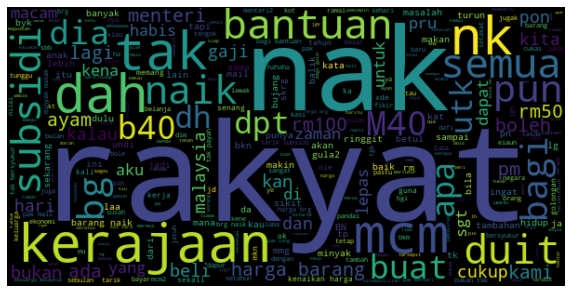

In [34]:
#@title Wordcloud visualization for Negative sentiment
# Import the wordcloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        stopwords = ['ni','tu','yg','je','ke','lah','la','dgn','ko','org'],
        max_words = 300,)


# Apply the wordcloud to the text.
wordcloud.generate(neg_text)

# Create a figure
fig, ax = plt.subplots(1,1, figsize = (10,8))
# Add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# Remove the axis
plt.axis("off")

(-0.5, 599.5, 299.5, -0.5)

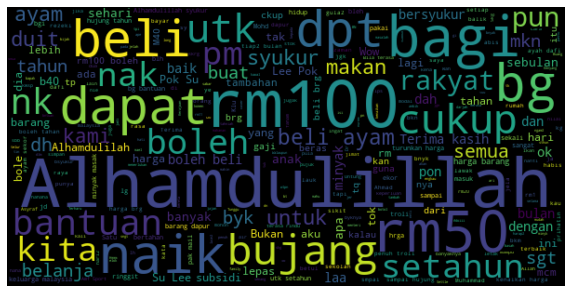

In [35]:
#@title Wordcloud visualization for Positive sentiment
# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        stopwords = ['ni','tu','yg','je','ke','lah','la','dgn','ko','org'],
        max_words = 300,)


# Apply the wordcloud to the text.
wordcloud.generate(pos_text)

# Create a figure
fig, ax = plt.subplots(1,1, figsize = (10,8))
# Add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# Remove the axis
plt.axis("off")

# Sentence token visualization

In [36]:
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [37]:
sample_neg = final_df[final_df['Sentiment']=='NEGATIVE']['comment'].tolist()[110]
sample_neg

'Mudah dibeli dgn duit utk tutup keresahan rakyat. Rakyat bergelut dgn ekonomi, org atas senang.'

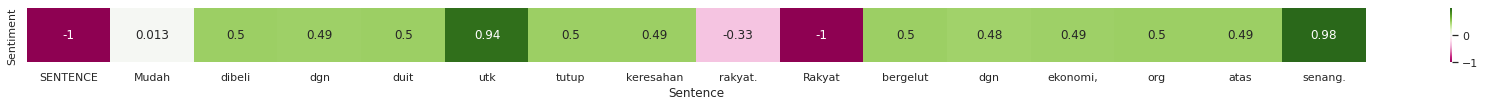

In [38]:
tokens = [token for token in sample_neg.split()]
temp_list = [model_malay.predict([s]) for s in tokens]
temp_dict = [model_malay.predict_proba([s]) for s in tokens]
score_list = [temp_dict[i][0][j[0]]*-1 if j[0]=='negative' else temp_dict[i][0][j[0]]*0.5 if j[0] == 'neutral' else temp_dict[i][0][j[0]]  for i,j in enumerate(temp_list)]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[-1]+score_list,
})